In [ ]:
# Install necessary libraries
!pip install tensorflow scikit-learn pandas matplotlib sexmachine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sexmachine: filename=SexMachine-0.1.1-py3-none-any.whl size=379441 sha256=e71964fd16ee17813dc09c40b85073123c4d6614ba5ed27001e0efca92ed557a
  Stored in directory: /root/.cache/pip/wheels/04/b5/d0/59428a0dd67a75a0c120a72bb7fef826f11ec744ae7905bb04
Successfully built sexmachine


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from datetime import datetime
import sexmachine.detector as gender


In [ ]:
def read_datasets():
    """Reads users profile from CSV files"""
    genuine_users = pd.read_csv("/content/users.csv")
    fake_users = pd.read_csv("/content/fusers.csv")

    # Combine datasets and create labels
    data = pd.concat([genuine_users, fake_users])
    labels = np.array([1] * len(genuine_users) + [0] * len(fake_users))  # 1 for genuine, 0 for fake

    return data, labels

In [ ]:
def predict_sex(names):
    """Predicts the gender based on names using the sexmachine library"""
    sex_predictor = gender.Detector(unknown_value="unknown", case_sensitive=False)
    first_names = names.str.split(' ').str.get(0)
    sex = first_names.apply(sex_predictor.get_gender)
    sex_dict = {'female': -2, 'mostly_female': -1, 'unknown': 0, 'mostly_male': 1, 'male': 2}
    return sex.map(sex_dict).astype(int)

In [ ]:

def extract_features(data):
    """Performs feature engineering on the dataset"""
    data['sex_code'] = predict_sex(data['name'])
    lang_list = list(enumerate(np.unique(data['lang'])))
    lang_dict = {name: i for i, name in lang_list}
    data['lang_code'] = data['lang'].map(lang_dict).astype(int)

    # Select relevant features
    feature_columns = ['statuses_count', 'followers_count', 'friends_count',
                       'favourites_count', 'listed_count', 'sex_code', 'lang_code']
    return data[feature_columns]

In [ ]:
!pip install gender-guesser


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 16.8 MB/s eta 0:00:00


In [ ]:
import gender_guesser.detector as gender

def predict_sex(names):
    """Predict gender based on first names using gender-guesser."""
    detector = gender.Detector(case_sensitive=False)

    # Extract first names
    first_names = names.str.split(' ').str.get(0).fillna('unknown')

    # Predict gender
    sex = first_names.apply(detector.get_gender)

    # Map gender categories to numerical values
    sex_dict = {
        'female': -2,
        'mostly_female': -1,
        'unknown': 0,
        'andy': 0,  # androgynous
        'mostly_male': 1,
        'male': 2
    }
    return sex.map(sex_dict).astype(int)


In [ ]:
# Load the data
data, labels = read_datasets()

# Extract features
data = extract_features(data)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4246 - loss: 0.6912 - val_accuracy: 0.8448 - val_loss: 0.5939
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.5658 - val_accuracy: 0.9756 - val_loss: 0.4587
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9506 - loss: 0.4318 - val_accuracy: 0.9734 - val_loss: 0.2917
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9503 - loss: 0.2805 - val_accuracy: 0.9734 - val_loss: 0.1799
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9494 - loss: 0.1985 - val_accuracy: 0.9756 - val_loss: 0.1266
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9464 - loss: 0.1687 - val_accuracy: 0.9778 - val_loss: 0.1028
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9528 - loss: 0.1383 - val_accuracy: 0.9778 - val_loss: 0.0916
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9566 - loss: 0.1296 - val_accuracy: 0.9778 - val_loss:

In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Fake', 'Genuine']))



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9822695035460993
Confusion Matrix:
 [[256   0]
 [ 10 298]]
Classification Report:
               precision    recall  f1-score   support

        Fake       0.96      1.00      0.98       256
     Genuine       1.00      0.97      0.98       308

    accuracy                           0.98       564
   macro avg       0.98      0.98      0.98       564
weighted avg       0.98      0.98      0.98       564



In [ ]:
def plot_roc_curve(y_test, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()




18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


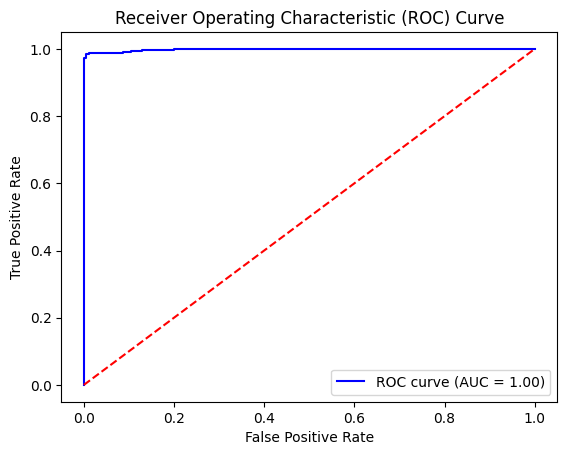

In [ ]:
# Plot the ROC curve
y_pred_probs = model.predict(X_test).ravel()
plot_roc_curve(y_test, y_pred_probs)

In [ ]:
# Example test data for a single user
# Example user data for Davide Dellacasa
user_data = pd.DataFrame({
    'name': ['Davide Dellacasa'],
    'statuses_count': [20370],
    'followers_count': [5470],
    'friends_count': [2385],
    'favourites_count': [145],
    'listed_count': [52],
    'lang': ['it']  # Assuming the language is Italian ("it")
})

# Extract features from the test data
user_data = extract_features(user_data)

# Normalize the test data
user_data_scaled = scaler.transform(user_data)

# Predict using the trained ANN model
user_pred_prob = model.predict(user_data_scaled)

# Convert the prediction probability to binary class (Fake=0, Genuine=1)
user_pred = (user_pred_prob > 0.5).astype(int)

# Output the prediction
print(f"The user is predicted to be: {'Genuine' if user_pred[0] == 1 else 'Fake'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The user is predicted to be: Genuine
